# Asha try: Finding the centers of each leaf and groping the pixels based on their distance.

In [66]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import random
from math import sqrt, floor
from PIL import Image, ImageEnhance

In [67]:
label_t=cv2.imread('ara2012_plant001_label.png')
label_t.shape

(226, 218, 3)

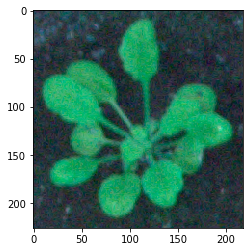

In [68]:
image=cv2.imread('ara2012_plant001_rgb.png')
plt.imshow(image)

In [69]:
# creating mask by removing background -------
def create_mask(path):
  
    image = cv2.cvtColor(path, cv2.COLOR_BGR2HSV) #to change into HSV
  
    #Remove colour except green
    green_Min = np.array([32,35,35])
    green_Max = np.array([90,255,255])
    mask = cv2.inRange(image, green_Min, green_Max)
    
    #Applying medianblur to eliminate small noise 
    mask = cv2.medianBlur(mask,13)
    mask_1 = cv2.bitwise_and(path, path, mask = mask)
  
    m= cv2.cvtColor(mask_1, cv2.COLOR_RGB2GRAY)
    kernel = np.ones((15,15),np.uint8)
    img=cv2.erode(m,kernel,iterations = 1)
    
    mask2 = cv2.dilate(img, kernel, iterations=1)
    #to convert in the binary
    ret, bin_img = cv2.threshold(mask2, 0, 250, cv2.THRESH_BINARY)
   
    return mask, mask2, bin_img

In [70]:
mask, m, l= create_mask(image)

C:\Users\ct\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """
C:\Users\ct\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':
C:\Users\ct\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


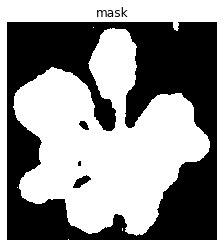

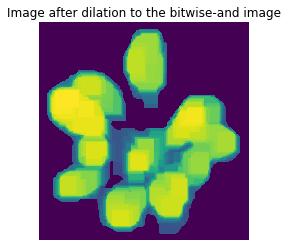

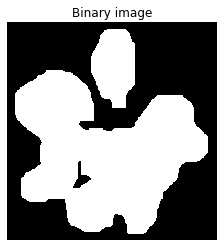

In [71]:
p1=plt.figure(1)
plt.imshow(mask, cmap='Greys_r')
plt.axis('off')
plt.title('mask')
p1.show()


p1=plt.figure(2)
plt.imshow(m)
plt.axis('off')
plt.title('Image after dilation to the bitwise-and image')
p1.show()

p1=plt.figure(3)
plt.imshow(l, cmap='Greys_r')
plt.axis('off')
plt.title('Binary image')
p1.show()

C:\Users\ct\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


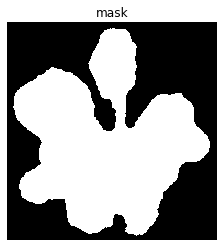

In [72]:
# working on mask --finding contour
# then, arranging them by the distance from the center of the image
# we use moment for this

#Find contours
_, th = cv2.threshold(mask, 127, 255, 0)
_, contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Arrange contour and use moments to find the closest to the center
foreground = contours[0]
min_val = image.shape[0]

for i in range(len(contours)):
    if cv2.contourArea(contours[i]) > 500: # check with 500
        M = cv2.moments(contours[i])
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        radius = sqrt((cx - image.shape[1]/2)**2 + (cy - image.shape[0]/2)**2)
        if min_val > radius:
            min_val = radius
            foreground = contours[i]
            
# drawing only plant on the mask
mask = cv2.drawContours(np.zeros((image.shape[0], image.shape[1], 3), np.uint8), [foreground], 0, (255,255,255), cv2.FILLED)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

p1=plt.figure(1)
plt.imshow(mask, cmap='Greys_r')
plt.axis('off')
plt.title('mask')
p1.show()

C:\Users\ct\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


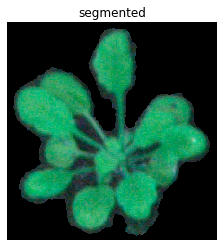

In [73]:
# just checking bitwise and image with mask ----------
segmented = cv2.bitwise_and(image , image , mask=mask)
p1=plt.figure(1)
plt.imshow(segmented, cmap='Greys_r')
plt.axis('off')
plt.title('segmented')
p1.show()

C:\Users\ct\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


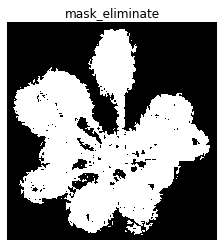

In [74]:
# eliminate remaining non-plant objects in the image like shadow

# Use narrower range to remove non-plant objects like shadow
hsv_img = cv2.cvtColor(segmented , cv2.COLOR_BGR2HSV)
choose_min = np.array([35, 30, 30], np.uint8)
choose_max = np.array([90, 255, 190], np.uint8)
mask_eliminate = cv2.inRange(hsv_img, choose_min, choose_max)

p1=plt.figure(1)
plt.imshow(mask_eliminate, cmap='Greys_r')
plt.axis('off')
plt.title('mask_eliminate')
p1.show()

C:\Users\ct\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


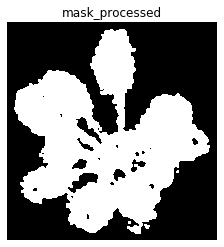

In [75]:
# some processing to smoothen the mask: blur ---

i = 1
if cv2.contourArea(foreground) > 30000:
    i = 3

mask_r = cv2.medianBlur(mask_eliminate , 3)
mask_e = cv2.erode(mask_r, None, iterations = int(i))
mask_d = cv2.dilate(mask_e, None, iterations = int(i))

p1=plt.figure(1)
plt.imshow(mask_d, cmap='Greys_r')
plt.axis('off')
plt.title('mask_processed')
p1.show()



C:\Users\ct\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\ct\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


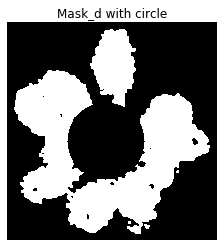

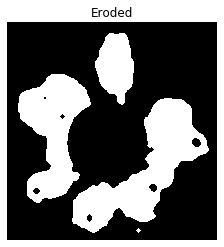

In [76]:
# each leaf segmentation -----------
# carry on from mask_d

mask_dilate = cv2.dilate(mask_d, None, iterations=2)
_, th_new = cv2.threshold(mask_dilate, 127, 255, 0)


# finding contours ---
_, contours_label, hierarchy = cv2.findContours(th_new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
label_max = sorted(contours_label, key = cv2.contourArea, reverse = True)[0]


#Next step is to compute the center of our biggest object using moments.
M_l = cv2.moments(label_max)
cx_l = int(M_l["m10"] / M_l["m00"])
cy_l = int(M_l["m01"] / M_l["m00"])


# adjusting variables based on size
area = cv2.contourArea(label_max)

if area > 1000 and area < 4000:
    r = 15
    scale = floor(area/2000)
else:
    if area < 10000:
        r = 20
        scale = floor(area/5000)
    else:
        r = 40
        scale = floor(area/8000)
if area > 40000:
    scale = floor(scale/2)

    
# Draw black circle at the center of all leaves
cv2.circle(mask_d, (cx_l, cy_l), r, color=(0,0,0), thickness = -2)

p1=plt.figure(1)
plt.imshow(mask_d, cmap='Greys_r')
plt.axis('off')
plt.title('Mask_d with circle')
p1.show()

# eroded---
kernel = np.ones((1+scale, 1+scale), np.uint8)
eroded = cv2.erode(mask_d, kernel, iterations = 1)
eroded = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel/2, iterations=1)
eroded = cv2.medianBlur(eroded, 5)

p1=plt.figure(2)
plt.imshow(eroded, cmap='Greys_r')
plt.axis('off')
plt.title('Eroded')
p1.show()

C:\Users\ct\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


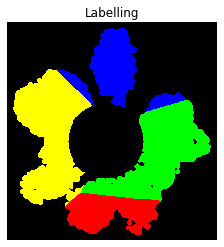

In [77]:
# Labeling with colors ---------
# carry on with mask_d

# finding the coordinates of the white pixels
wh = np.where(mask_d==[255])
ij_image = zip(wh[1], wh[0])
ij_image = list(ij_image)


_, th = cv2.threshold(eroded, 127, 255, 0)
_, contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


img_zeros = np.zeros((mask_d.shape[0], mask_d.shape[1], 3), dtype=np.uint8) 

# our colors
colors=[(255,0,0),(0,255,0),(255,255,0),(0,0,255),(255,0,255),( 0,255,255),(128,128,128),(128,0,0)]

cx, cy = [], []
for i in range(len(contours)):
    M = cv2.moments(contours[i])
    cx.append(int(M["m10"] / M["m00"]))
    cy.append(int(M["m01"] / M["m00"]))

    
for ij in ij_image:       
    m_dist = mask_d.shape[0]
    idx = 0
    for i in range(len(contours)):
        d = sqrt(((ij[0] - cx[i])**2) + ((ij[1] - cy[i])**2))
        if d < m_dist:
            m_dist = d
            idx = i

    # circle printing one pixel
    cv2.circle(img_zeros, ij, 1, color=colors[idx])
    
   

p1=plt.figure(1)
plt.imshow(img_zeros)
plt.axis('off')
plt.title('Labelling')
p1.show()    


In [78]:
def convert_bool(g):
    (g[g > 0] == 1).astype('bool')
    (g[g == 0] == 0).astype('bool')
    return g

In [88]:
def convert_bool(g):
    m = g.copy()
    m[g >0] = True
    m[g == 0] = False
    return m

In [89]:
img_zeros=convert_bool(img_zeros)

In [90]:
label_t=convert_bool(label_t)

In [91]:
print(img_zeros.shape)

(226, 218, 3)


In [92]:
print(label_t.shape)

(226, 218, 3)


In [93]:
# Similarity dice measures
# calculate dice
def dice_calc (ground_th, ours):

    numerator = 2 * np.sum(ground_th * ours)
    denominator = np.sum(ground_th) + np.sum(ours)

    dice = float(numerator) / float(denominator)
    
    return dice


In [94]:
dice_calc(label_t, img_zeros)

0.5050378177647926

In [95]:
# calculate best dice -------
def best_dice (groud_th, ours):

    ground_th_idx = list(set(np.unique(groud_th)).difference([0]))
    ours_idx = list(set(np.unique(ours)).difference([0]))

    best_dice_collect = []
    for i_gt in ground_th_idx:
        
        gt = (groud_th == i_gt).astype('bool')
        
        dice_collect = []
        
        for i_ours in ours_idx:
            
            ors = (ours == i_ours).astype('bool')

            dice = dice_calc(gt, ors)
            
            dice_collect.append(dice)
        
        best_dice = np.max(dice_collect)
        best_dice_collect.append(best_dice)

    best_d = np.mean(best_dice_collect)

    return best_d




In [96]:
# symmetric best dice calculation ----------
def symm_best_dice (ground_th, ours):

    d1 = best_dice(ground_th, ours)
    d2 = best_dice(ours, ground_th)
    
    arr = np.array ([d1, d2])
    symm_best = np.min(arr)
    return symm_best

In [97]:
symm_best_dice (label_t, img_zeros)

0.5050378177647926